# Spline Basis in 1D, 2D, and 3D

In [2]:
import numpy as np

def B_spline_basis(t, degree, i, knots):
    """Recursive definition of B-spline basis function of given degree."""
    if degree == 0:
        return 1.0 if knots[i] <= t < knots[i+1] else 0.0
    else:
        coef1 = (t - knots[i]) / (knots[i+degree] - knots[i]) if knots[i+degree] != knots[i] else 0
        coef2 = (knots[i+degree+1] - t) / (knots[i+degree+1] - knots[i+1]) if knots[i+degree+1] != knots[i+1] else 0
        return coef1 * B_spline_basis(t, degree-1, i, knots) + coef2 * B_spline_basis(t, degree-1, i+1, knots)

**1D**

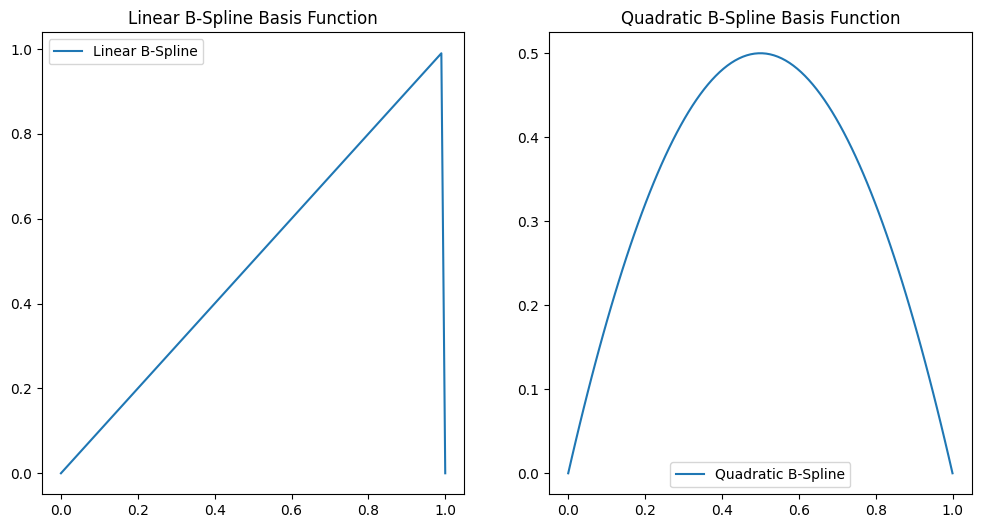

In [3]:
# Define knots for linear and quadratic B-splines for a unit interval
knots_linear = [0, 0, 1, 1]  # Clamped knots for linear B-splines
knots_quadratic = [0, 0, 0, 1, 1, 1]  # Clamped knots for quadratic B-splines

# Evaluate some example points
t_values = np.linspace(0, 1, num=100)
linear_basis = [B_spline_basis(t, 1, 1, knots_linear) for t in t_values]
quadratic_basis = [B_spline_basis(t, 2, 1, knots_quadratic) for t in t_values]

# Plot the basis functions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_values, linear_basis, label='Linear B-Spline')
plt.title('Linear B-Spline Basis Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_values, quadratic_basis, label='Quadratic B-Spline')
plt.title('Quadratic B-Spline Basis Function')
plt.legend()

plt.show()

**2D**

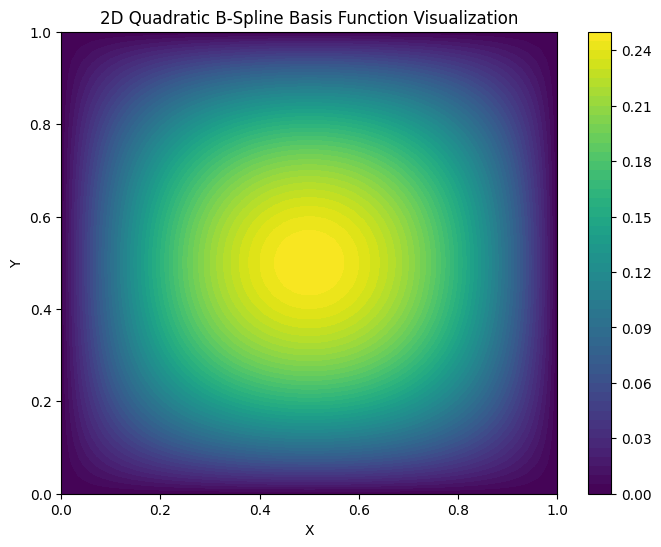

In [5]:
def tensor_product_basis_2D(x, y, degree, knots):
    """Compute the tensor product of 1D B-spline basis functions for 2D."""
    basis_x = B_spline_basis(x, degree, 1, knots)
    basis_y = B_spline_basis(y, degree, 1, knots)
    return basis_x * basis_y

# Define knots for linear and quadratic B-splines for a unit square
degree = 2  # Change to 1 for linear basis
knots = [0, 0, 0, 1, 1, 1]  # Clamped knots for quadratic B-splines

# Sample points in a grid within the unit square
grid_size = 50
x = np.linspace(0, 1, num=grid_size)
y = np.linspace(0, 1, num=grid_size)
X, Y = np.meshgrid(x, y, indexing='ij')

# Evaluate the basis function at each point in the grid
values = np.zeros((grid_size, grid_size))
for i in range(grid_size):
    for j in range(grid_size):
        values[i, j] = tensor_product_basis_2D(X[i, j], Y[i, j], degree, knots)

# Visualize the basis function
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, values, levels=50, cmap='viridis')
plt.colorbar()
plt.title('2D Quadratic B-Spline Basis Function Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**3D**

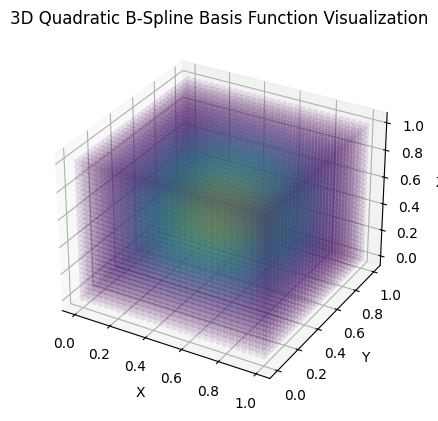

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def B_spline_basis(t, degree, i, knots):
    """Recursive definition of B-spline basis function of given degree."""
    if degree == 0:
        return 1.0 if knots[i] <= t < knots[i+1] else 0.0
    else:
        coef1 = (t - knots[i]) / (knots[i+degree] - knots[i]) if knots[i+degree] != knots[i] else 0
        coef2 = (knots[i+degree+1] - t) / (knots[i+degree+1] - knots[i+1]) if knots[i+degree+1] != knots[i+1] else 0
        return coef1 * B_spline_basis(t, degree-1, i, knots) + coef2 * B_spline_basis(t, degree-1, i+1, knots)

def tensor_product_basis(x, y, z, degree, knots):
    """Compute the tensor product of 1D B-spline basis functions."""
    basis_x = B_spline_basis(x, degree, 1, knots)
    basis_y = B_spline_basis(y, degree, 1, knots)
    basis_z = B_spline_basis(z, degree, 1, knots)
    return basis_x * basis_y * basis_z

# Define knots for quadratic B-splines for a unit cube
degree = 2
knots = [0, 0, 0, 1, 1, 1]  # Clamped knots for quadratic B-splines

# Sample points in a grid within the unit cube
grid_size = 30
x = np.linspace(0, 1, num=grid_size)
y = np.linspace(0, 1, num=grid_size)
z = np.linspace(0, 1, num=grid_size)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Evaluate the basis function at each point in the grid
values = np.zeros((grid_size, grid_size, grid_size))
for i in range(grid_size):
    for j in range(grid_size):
        for k in range(grid_size):
            values[i, j, k] = tensor_product_basis(X[i, j, k], Y[i, j, k], Z[i, j, k], degree, knots)

# Visualize the basis function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create transparency based on values
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.viridis(norm(values))

# Flatten arrays for plotting
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()
colors_flat = colors.reshape((grid_size**3, 4))

# Scatter plot with variable transparency
scatter = ax.scatter(X_flat, Y_flat, Z_flat, c=colors_flat, marker='o', edgecolor='none', alpha=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Quadratic B-Spline Basis Function Visualization')
plt.show()